In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [10]:
# Set Dimension and delta
lenX = 101
lenY = 101
delta = 1

# Boundary conditions
Ttop = 0
Tbottom = 0
Tleft = 0
Tright = 0

# Initial guess of interior grid
Tguess = 0

t_final = 2            # s, observation period
dt = 0.01              # s, time step

In [11]:
# 't' stores the times of observation
t = np.arange(0, t_final, dt)

# 'dTdt' stores the time-derivative of temperature at all nodes, initially empty
dTdt = np.empty((lenY, lenX))

# Set colour interpolation and colour map
colorinterpolation = 100
colourMap = plt.cm.jet

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess
T = np.empty((lenY, lenX))
T.fill(Tguess)

# Set boundary conditions
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

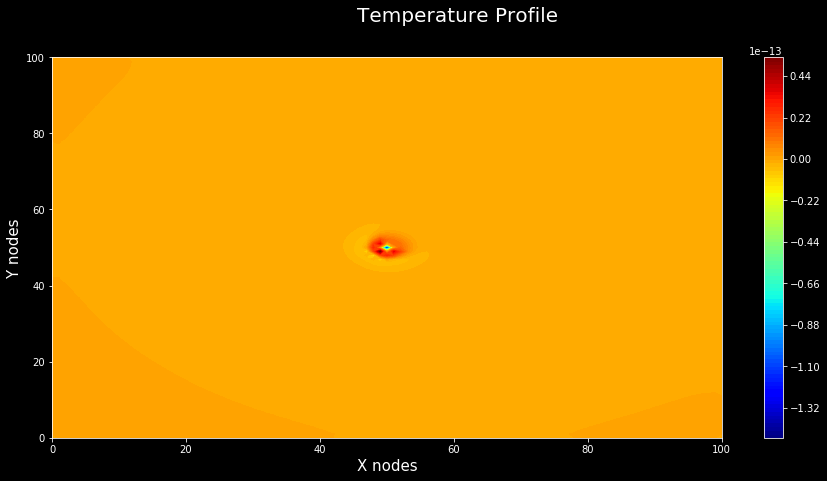

In [12]:
# Iterate over all the time steps
for k in range(1,len(t)):
    
    T[int(lenY/2),int(lenX/2)] = 10*np.sin(np.pi*k)
    
    for i in range(1, lenY-1, delta):
        for j in range(1, lenX-1, delta):
            if i == int(lenY/2) and j == int(lenX/2):
                continue
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    
    # Plot the results for each time step
    plt.figure(figsize=[15, 7])
    plt.style.use('dark_background')
    plt.suptitle("Temperature Profile", fontsize=20)
    plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
    plt.xlabel("X nodes", fontsize=15)
    plt.ylabel("Y nodes", fontsize=15)
    # Set Colorbar
    plt.colorbar()
    plt.pause(0.001)
    clear_output(wait=True)